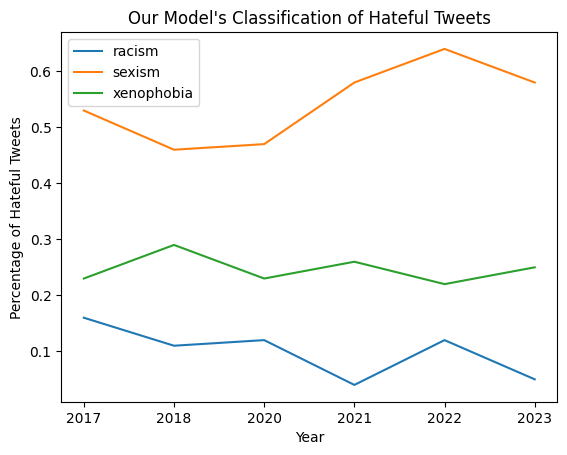

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

years = ['2017', '2018', '2020', '2021', '2022', '2023']
racism = []
sexism = []
xenophobia = []

# Combine all the predictions into one file
with open('model_preds.csv', 'w') as f:
    f.write('year,racism,sexism,xenophobia\n')
    for i in range(7, 9):
        data = pd.read_csv(f'201{i}_predictions.csv')
        for j in range(100):
            f.write(
                f'201{i},{data["racism"][j]},{data["sexism"][j]},{data["xenophobia"][j]}\n')
    for i in range(0, 4):
        data = pd.read_csv(f'202{i}_predictions.csv')
        for j in range(100):
            f.write(
                f'202{i},{data["racism"][j]},{data["sexism"][j]},{data["xenophobia"][j]}\n')
            
# Find averages of predictions for each year
data = pd.read_csv('model_preds.csv')
for i in range(0, 601, 100):
    racism.append(data['racism'][i:i+100].mean())
    sexism.append(data['sexism'][i:i+100].mean())
    xenophobia.append(data['xenophobia'][i:i+100].mean())

# Plot the data
plt.plot(years, racism, label='racism')
plt.plot(years, sexism, label='sexism')
plt.plot(years, xenophobia, label='xenophobia')

plt.xlabel('Year')
plt.ylabel('Percentage of Hateful Tweets')
plt.title('Our Model\'s Classification of Hateful Tweets')

plt.legend()
plt.show()


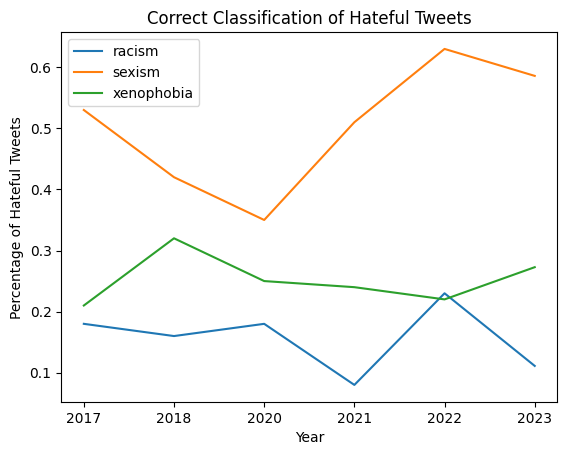

In [30]:
# Plot the correct predictions
racism = []
sexism = []
xenophobia = []
data = pd.read_csv('correct_preds.csv')
for i in range(1, 600, 100):
    racism.append(data['racism'][i:i+100].mean())
    sexism.append(data['sexism'][i:i+100].mean())
    xenophobia.append(data['xenophobia'][i:i+100].mean())

plt.plot(years, racism, label='racism')
plt.plot(years, sexism, label='sexism')
plt.plot(years, xenophobia, label='xenophobia')

plt.xlabel('Year')
plt.ylabel('Percentage of Hateful Tweets')
plt.title('Correct Classification of Hateful Tweets')

plt.legend()
plt.show()

In [32]:
# compare predictions to correct predictions and generate 3 f1 scores

from sklearn.metrics import f1_score
import random

racism_preds = []
sexism_preds = []
xenophobia_preds = []
racism_correct = []
sexism_correct = []
xenophobia_correct = []
model_data = pd.read_csv('model_preds.csv')
correct_data = pd.read_csv('correct_preds.csv')
for i in range(0, 600):
    racism_preds.append(model_data['racism'][i])
    sexism_preds.append(model_data['sexism'][i])
    xenophobia_preds.append(model_data['xenophobia'][i])
    racism_correct.append(correct_data['racism'][i])
    sexism_correct.append(correct_data['sexism'][i])
    xenophobia_correct.append(correct_data['xenophobia'][i])


racism_f1 = f1_score(racism_correct, racism_preds)
sexism_f1 = f1_score(sexism_correct, sexism_preds)
xenophobia_f1 = f1_score(xenophobia_correct, xenophobia_preds)

print("Results of our model:")
print(f'Racism F1 Score: {racism_f1}')
print(f'Sexism F1 Score: {sexism_f1}')
print(f'Xenophobia F1 Score: {xenophobia_f1}')
print(f'Average F1 Score: {(racism_f1 + sexism_f1 + xenophobia_f1) / 3}')
print()

#random baseline
racism_preds = [random.randint(0, 1) for _ in range(600)]
sexism_preds = [random.randint(0, 1) for _ in range(600)]
xenophobia_preds = [random.randint(0, 1) for _ in range(600)]

racism_f1 = f1_score(racism_correct, racism_preds)
sexism_f1 = f1_score(sexism_correct, sexism_preds)
xenophobia_f1 = f1_score(xenophobia_correct, xenophobia_preds)

print("Results of random baseline:")
print(f'Racism F1 Score: {racism_f1}')
print(f'Sexism F1 Score: {sexism_f1}')
print(f'Xenophobia F1 Score: {xenophobia_f1}')
print(f'Average F1 Score: {(racism_f1 + sexism_f1 + xenophobia_f1) / 3}')
print()

#majority baseline
racism_preds = [1 for _ in range(600)]
sexism_preds = [1 for _ in range(600)]
xenophobia_preds = [1 for _ in range(600)]

racism_f1 = f1_score(racism_correct, racism_preds)
sexism_f1 = f1_score(sexism_correct, sexism_preds)
xenophobia_f1 = f1_score(xenophobia_correct, xenophobia_preds)

print("Results of majority baseline:")
print(f'Racism F1 Score: {racism_f1}')
print(f'Sexism F1 Score: {sexism_f1}')
print(f'Xenophobia F1 Score: {xenophobia_f1}')
print(f'Average F1 Score: {(racism_f1 + sexism_f1 + xenophobia_f1) / 3}')
print()


Results of our model:
Racism F1 Score: 0.6753246753246753
Sexism F1 Score: 0.8821656050955414
Xenophobia F1 Score: 0.802675585284281
Average F1 Score: 0.7867219552348326

Results of random baseline:
Racism F1 Score: 0.263681592039801
Sexism F1 Score: 0.4794520547945205
Xenophobia F1 Score: 0.34146341463414637
Average F1 Score: 0.3615323538228226

Results of majority baseline:
Racism F1 Score: 0.0
Sexism F1 Score: 0.0
Xenophobia F1 Score: 0.0
Average F1 Score: 0.0

